<a href="https://colab.research.google.com/github/bahbi/emd-desafio-junior-data-scientist/blob/main/Visualizacao_analisePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pywaffle

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import pandas as pd

import pandas as pd
from pywaffle import Waffle
import matplotlib.pyplot as plt

%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt


##visualização chamados 1746 - data específica

In [ ]:
df1 = pd.read_csv('/content/chamados_parte1.csv', delimiter=',')
df1.head()

,id_chamado,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,id_unidade_organizacional_mae,...,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao,geometry
0,18516246,2023-04-01 00:55:38,2023-04-01 00:55:38,NaN,NaN,NaN,NaN,1706,TR/SUBOP/CFT - Coordenadoria de Fiscalização e...,SMTR - Secretaria Municipal de Transportes,...,NaN,D,F,No prazo,Encerrado,Atendido parcialmente,NaN,0,2023-04-01,NaN
1,18516254,2023-04-01 01:08:04,2023-04-01 01:43:38,1.0,1.0,62364.0,60.0,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,...,NaN,H,F,No prazo,Encerrado,Não constatado,NaN,0,2023-04-01,NaN
2,18516194,2023-04-01 00:04:59,NaN,14.0,1.0,76992.0,120.0,1240,CCU - 1º Serviço de Fiscalização,CCU - Coordenadoria de Controle Urbano,...,NaN,D,F,Fora do prazo,Não Encerrado,Andamento,NaN,0,2023-04-01,POINT(-43.186679 -22.921335)
3,18516238,2023-04-01 00:38:22,NaN,5.0,1.0,60483.0,319.0,1258,CFE - Coordenação de Feiras,SEOP - Secretaria Municipal de Ordem Pública,...,NaN,D,F,Fora do prazo,Não Encerrado,Andamento,NaN,0,2023-04-01,POINT(-43.1882526 -22.9122295)
4,18516208,2023-04-01 00:14:00,NaN,14.0,1.0,76992.0,90.0,82,CLF - Coordenadoria de Licenciamento e Fiscali...,CLF - Coordenadoria de Licenciamento e Fiscali...,...,NaN,D,F,Fora do prazo,Não Encerrado,Andamento,NaN,0,2023-04-01,POINT(-43.1872883 -22.9211226)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_chamado                        73 non-null     int64  
 1   data_inicio                       73 non-null     object 
 2   data_fim                          9 non-null      object 
 3   id_bairro                         72 non-null     float64
 4   id_territorialidade               72 non-null     float64
 5   id_logradouro                     72 non-null     float64
 6   numero_logradouro                 70 non-null     float64
 7   id_unidade_organizacional         73 non-null     int64  
 8   nome_unidade_organizacional       73 non-null     object 
 9   id_unidade_organizacional_mae     73 non-null     object 
 10  unidade_organizacional_ouvidoria  73 non-null     bool   
 11  categoria                         73 non-null     object 
 12  id_tipo   

In [ ]:
df_bairros = pd.read_csv('/content/bairros_rj.csv', delimiter=',')
df_bairros.head()

,id_bairro,nome,id_area_planejamento,id_regiao_planejamento,nome_regiao_planejamento,id_regiao_administrativa,nome_regiao_administrativa,subprefeitura,area,perimetro,geometry_wkt,geometry
0,2,Gamboa,1,1.1,Centro,1,Portuaria,Centro,1.112903e+06,4612.833630,POLYGON ((-43.18791509600138 -22.8931217212322...,"POLYGON((-43.1879150960014 -22.8931217212322, ..."
1,1,Saúde,1,1.1,Centro,1,Portuaria,Centro,3.638176e+05,2646.220568,POLYGON ((-43.181151633502964 -22.895430284304...,"POLYGON((-43.181151633503 -22.8954302843042, -..."
2,4,Caju,1,1.1,Centro,1,Portuaria,Centro,5.347481e+06,19800.522524,MULTIPOLYGON (((-43.22522241788469 -22.8746498...,MULTIPOLYGON(((-43.196711909178 -22.8872495021...
3,3,Santo Cristo,1,1.1,Centro,1,Portuaria,Centro,1.684721e+06,6743.227885,POLYGON ((-43.194498082949806 -22.903378003392...,"POLYGON((-43.1944980829498 -22.9033780033923, ..."
4,161,Lapa,1,1.1,Centro,2,Centro,Centro,2.983258e+05,3849.181818,POLYGON ((-43.18166120770202 -22.9120798224676...,"POLYGON((-43.181661207702 -22.9120798224677, -..."


In [ ]:
df1_selecionado = df1[['id_chamado', 'data_inicio','id_bairro','tipo',
                       'subtipo','status','longitude','latitude','reclamacoes','geometry']]
df1_selecionado

,id_chamado,data_inicio,id_bairro,tipo,subtipo,status,longitude,latitude,reclamacoes,geometry
0,18516246,2023-04-01 00:55:38,NaN,Ônibus,Verificação de ar condicionado inoperante no ô...,Fechado com informação,NaN,NaN,0,NaN
1,18516254,2023-04-01 01:08:04,1.0,Estacionamento Irregular,Fiscalização de estacionamento irregular de ve...,Não constatado,NaN,NaN,0,NaN
2,18516194,2023-04-01 00:04:59,14.0,Comércio ambulante,Fiscalização de comércio ambulante,Aberto,-43.186679,-22.921335,0,POINT(-43.186679 -22.921335)
3,18516238,2023-04-01 00:38:22,5.0,Feiras,"Fiscalização/Inspeção de feira livre, feira de...",Aberto,-43.188253,-22.912229,0,POINT(-43.1882526 -22.9122295)
4,18516208,2023-04-01 00:14:00,14.0,Ocupação de área pública,Fiscalização da ocupação de área pública por m...,Aberto,-43.187288,-22.921123,0,POINT(-43.1872883 -22.9211226)
...,...,...,...,...,...,...,...,...,...,...
68,18516249,2023-04-01 00:59:40,144.0,Poluição sonora,Perturbação do sossego,Em Andamento,-43.563247,-22.879665,0,POINT(-43.563247 -22.8796648)
69,18516195,2023-04-01 00:07:07,145.0,Poluição sonora,Perturbação do sossego,Em Andamento,-43.537462,-22.891154,0,POINT(-43.537462 -22.891154)
70,18516207,2023-04-01 00:13:28,144.0,Manejo Arbóreo,Poda de árvore em logradouro,Aberto,NaN,NaN,0,NaN
71,18516211,2023-04-01 00:14:51,148.0,Poluição sonora,Perturbação do sossego,Em Andamento,NaN,NaN,0,NaN


In [ ]:
df_selecionado_bairros = df_bairros[['id_bairro', 'nome','subprefeitura']]
df_selecionado_bairros

,id_bairro,nome,subprefeitura
0,2,Gamboa,Centro
1,1,Saúde,Centro
2,4,Caju,Centro
3,3,Santo Cristo,Centro
4,161,Lapa,Centro
...,...,...,...
159,150,Sepetiba,Zona Oeste
160,152,Barra de Guaratiba,Zona Oeste
161,164,Ilha de Guaratiba,Zona Oeste
162,151,Guaratiba,Zona Oeste


In [ ]:
df_uniao_chamados_bairros = pd.merge(df1_selecionado, df_selecionado_bairros, on='id_bairro', how='left')

df_uniao_chamados_bairros.head()

,id_chamado,data_inicio,id_bairro,tipo,subtipo,status,longitude,latitude,reclamacoes,geometry,nome,subprefeitura
0,18516246,2023-04-01 00:55:38,NaN,Ônibus,Verificação de ar condicionado inoperante no ô...,Fechado com informação,NaN,NaN,0,NaN,NaN,NaN
1,18516254,2023-04-01 01:08:04,1.0,Estacionamento Irregular,Fiscalização de estacionamento irregular de ve...,Não constatado,NaN,NaN,0,NaN,Saúde,Centro
2,18516194,2023-04-01 00:04:59,14.0,Comércio ambulante,Fiscalização de comércio ambulante,Aberto,-43.186679,-22.921335,0,POINT(-43.186679 -22.921335),Santa Teresa,Centro
3,18516238,2023-04-01 00:38:22,5.0,Feiras,"Fiscalização/Inspeção de feira livre, feira de...",Aberto,-43.188253,-22.912229,0,POINT(-43.1882526 -22.9122295),Centro,Centro
4,18516208,2023-04-01 00:14:00,14.0,Ocupação de área pública,Fiscalização da ocupação de área pública por m...,Aberto,-43.187288,-22.921123,0,POINT(-43.1872883 -22.9211226),Santa Teresa,Centro


In [ ]:
df_uniao_chamados_bairros.to_csv('df_uniao_chamados_bairros_final.csv', sep=',', index = False)

In [ ]:
df_uniao_chamados_bairros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_chamado     73 non-null     int64  
 1   data_inicio    73 non-null     object 
 2   id_bairro      72 non-null     float64
 3   tipo           73 non-null     object 
 4   subtipo        73 non-null     object 
 5   status         73 non-null     object 
 6   longitude      55 non-null     float64
 7   latitude       55 non-null     float64
 8   reclamacoes    73 non-null     int64  
 9   geometry       55 non-null     object 
 10  nome           72 non-null     object 
 11  subprefeitura  72 non-null     object 
dtypes: float64(3), int64(2), object(7)
memory usage: 7.4+ KB


###Exploração dos chamados registrados na data específica

###Gráfico de barras para tipos de chamados

In [ ]:
ocorrencias_por_tipo = df_uniao_chamados_bairros['tipo'].value_counts()
df_ocorrencias_por_tipo = pd.DataFrame({'tipo': ocorrencias_por_tipo.index, 'contagem': ocorrencias_por_tipo.values})
df_ocorrencias_por_tipo

,tipo,contagem
0,Poluição sonora,24
1,Estacionamento Irregular,9
2,Iluminação Pública,8
3,Remoção Gratuita,5
4,Limpeza,5
5,Postura Municipal,4
6,Ocupação de área pública,3
7,Pavimentação,3
8,Comlurb - Vetores,2
9,Fiscalização de obras,2


<ipython-input-18-7fe9f642af97>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contagem', y='tipo', data=df_top, palette=custom_palette)


Text(0, 0.5, '')

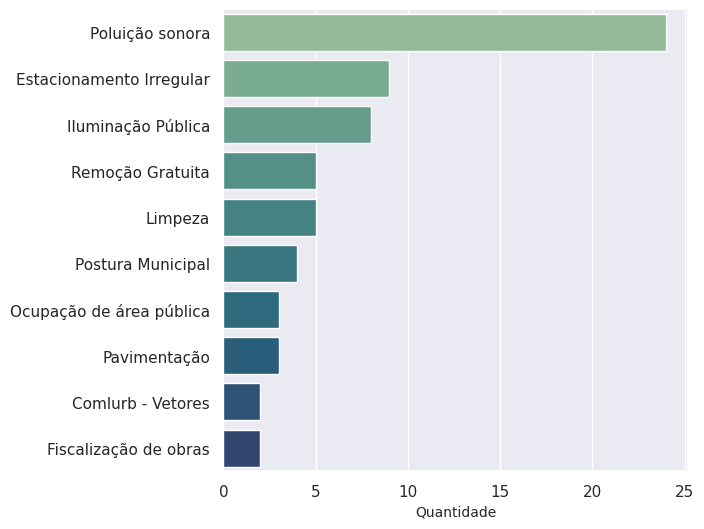

In [ ]:
barras_qtd = 10
df_top = df_ocorrencias_por_tipo.head(barras_qtd)

# Transformando a primeira letra em maiúscula na coluna 'index'
#df_top.loc[:, 'urlCleaned'] = df_top['urlCleaned'].str.capitalize()

sns.set()
#custom_palette = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True, n_colors=barras_qtd)
#custom_palette = sns.diverging_palette(145, 300, s=60)

custom_palette = sns.color_palette("crest", n_colors=barras_qtd)
plt.figure(figsize=(6,6))
sns.barplot(x='contagem', y='tipo', data=df_top, palette=custom_palette)
plt.xlabel('Quantidade', fontsize=10)
#plt.xlabel('amount', fontsize=12)
plt.ylabel('')  # Oculta a legenda lateral

#plt.savefig('urls_2.png', format='png', bbox_inches='tight')

In [ ]:
ocorrencias_por_subtipo = df_uniao_chamados_bairros['subtipo'].value_counts()
ocorrencias_por_subtipo

Perturbação do sossego                                                                        24
Fiscalização de estacionamento irregular de veículo                                            9
Reparo de lâmpada apagada                                                                      6
Remoção de entulho e bens inservíveis                                                          5
Fiscalização de carros de som                                                                  4
Reparo de buraco, deformação ou afundamento na pista                                           3
Fiscalização de obras em imóvel privado                                                        2
Controle de roedores e caramujos africanos                                                     2
Poda de árvore em logradouro                                                                   2
Reparo de Luminária                                                                            2
Capina em logradouro          

###Status dos chamados

In [ ]:
ocorrencias_por_status = df_uniao_chamados_bairros['status'].value_counts()
df_ocorrencias_por_status = pd.DataFrame({'status': ocorrencias_por_status.index, 'contagem': ocorrencias_por_status.values})
df_ocorrencias_por_status

,status,contagem
0,Aberto,39
1,Em Andamento,25
2,Fechado com solução,5
3,Não constatado,3
4,Fechado com informação,1


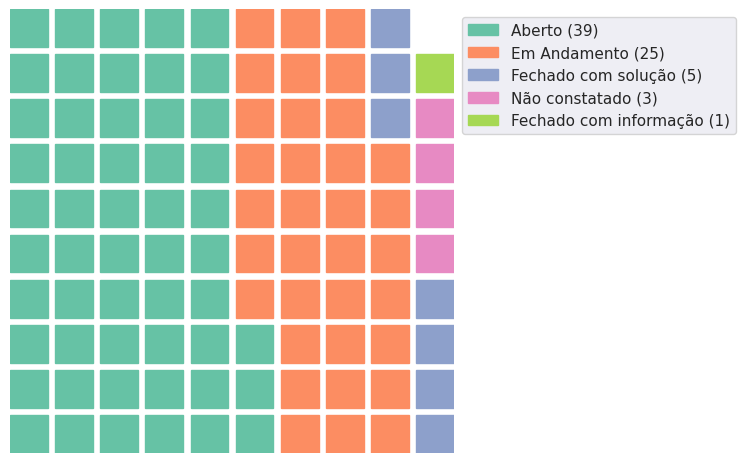

In [ ]:
ocorrencias_por_status = df_uniao_chamados_bairros['status'].value_counts()
df_ocorrencias_por_status = pd.DataFrame({'status': ocorrencias_por_status.index, 'contagem': ocorrencias_por_status.values})


legend_labels = [f"{status} ({contagem})" for status, contagem in zip(df_ocorrencias_por_status['status'], df_ocorrencias_por_status['contagem'])]


plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=10,
    values=dict(zip(df_ocorrencias_por_status['status'], df_ocorrencias_por_status['contagem'])),
    legend={'labels': legend_labels, 'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

plt.show()


###Chamados por bairros

Pontos de chamados por bairro

In [ ]:
#import plotly.express as px
#import pandas as pd


fig = px.scatter_mapbox(df_uniao_chamados_bairros,
                        lat='latitude',
                        lon='longitude',
                        color='tipo',
                        hover_name='nome',
                        zoom=10,
                        mapbox_style="carto-positron",
                        center=dict(lat=-22.9068467, lon=-43.1728965),
                        title='Pontos de Chamados por Bairro')

fig.show()

In [ ]:
bairros_mais_chamados = df_uniao_chamados_bairros['nome'].value_counts()
bairros_mais_chamados

Engenho de Dentro         8
Leblon                    6
Campo Grande              6
Barra da Tijuca           5
Engenho da Rainha         5
Tijuca                    3
Santa Teresa              3
Paciência                 2
Vila da Penha             2
Lapa                      2
Jacarepaguá               2
Bangu                     2
Ipanema                   2
Irajá                     2
Taquara                   1
Itanhangá                 1
Tanque                    1
Pechincha                 1
Guaratiba                 1
Realengo                  1
Senador Vasconcelos       1
Encantado                 1
Saúde                     1
Olaria                    1
Vista Alegre              1
Penha                     1
Cascadura                 1
Guadalupe                 1
Cavalcanti                1
Vila Isabel               1
Botafogo                  1
Catete                    1
Laranjeiras               1
Flamengo                  1
Centro                    1
Ricardo de Albuquerq

Gráfico de barras empilhadas para tipo de chamados por subprefeitura

In [ ]:
#import plotly.express as px
#import pandas as pd

df_count = df_uniao_chamados_bairros.groupby(['subprefeitura', 'tipo']).size().reset_index(name='count')

# Criar o gráfico de barras empilhadas
fig = px.bar(df_count,
             x='subprefeitura',
             y='count',
             color='tipo',
             title='Tipos de Chamados por Subprefeitura',
             labels={'count': 'Número de Chamados'},
             barmode='stack')


fig.show()

##visualização parte 2 - PS e eventos

In [ ]:
df_filtrado1 = pd.read_csv('/content/chamados_parte2.csv', delimiter=',')
df_filtrado1.head()

,id_chamado,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,id_unidade_organizacional_mae,...,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao,geometry
0,18515698,2023-03-31 19:36:34,2023-03-31 23:09:36,144.0,5.0,24166.0,80.0,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,...,NaN,D,F,No prazo,Encerrado,Não constatado,NaN,0,2023-03-01,POINT(-43.5605159 -22.8873115)
1,18515784,2023-03-31 20:01:36,2023-03-31 23:29:27,144.0,5.0,24166.0,80.0,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,...,NaN,D,F,No prazo,Encerrado,Não constatado,NaN,0,2023-03-01,POINT(-43.5605159 -22.8873115)
2,18515493,2023-03-31 18:39:59,2023-04-01 00:38:02,42.0,3.0,41673.0,123.0,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,...,NaN,D,F,No prazo,Encerrado,Não constatado,NaN,0,2023-03-01,POINT(-43.2689117 -22.8464278)
3,18515396,2023-03-31 18:15:46,2023-03-31 22:22:53,50.0,3.0,69377.0,187.0,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,...,NaN,D,F,No prazo,Encerrado,Não constatado,NaN,0,2023-03-01,POINT(-43.263609 -22.873354)
4,18516155,2023-03-31 23:43:50,2023-04-01 01:47:33,63.0,3.0,68965.0,5.0,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,...,NaN,D,F,No prazo,Encerrado,Atendido,NaN,0,2023-03-01,POINT(-43.2874473 -22.903697)


In [ ]:
df2_selecionado = df_filtrado1[['id_chamado', 'data_inicio','id_bairro','categoria','tipo',
                       'subtipo','status','longitude','latitude','reclamacoes','geometry']]
df2_selecionado

,id_chamado,data_inicio,id_bairro,categoria,tipo,subtipo,status,longitude,latitude,reclamacoes,geometry
0,18515698,2023-03-31 19:36:34,144.0,Serviço,Poluição sonora,Perturbação do sossego,Não constatado,-43.560516,-22.887311,0,POINT(-43.5605159 -22.8873115)
1,18515784,2023-03-31 20:01:36,144.0,Serviço,Poluição sonora,Perturbação do sossego,Não constatado,-43.560516,-22.887311,0,POINT(-43.5605159 -22.8873115)
2,18515493,2023-03-31 18:39:59,42.0,Serviço,Poluição sonora,Perturbação do sossego,Não constatado,-43.268912,-22.846428,0,POINT(-43.2689117 -22.8464278)
3,18515396,2023-03-31 18:15:46,50.0,Serviço,Poluição sonora,Perturbação do sossego,Não constatado,-43.263609,-22.873354,0,POINT(-43.263609 -22.873354)
4,18516155,2023-03-31 23:43:50,63.0,Serviço,Poluição sonora,Perturbação do sossego,Fechado com solução,-43.287447,-22.903697,0,POINT(-43.2874473 -22.903697)
...,...,...,...,...,...,...,...,...,...,...,...
42403,17955283,2022-11-26 23:53:40,161.0,Serviço,Poluição sonora,Perturbação do sossego,Sem possibilidade de atendimento,-43.177892,-22.916407,0,POINT(-43.1778916 -22.9164071)
42404,17916869,2022-11-16 21:40:59,161.0,Serviço,Poluição sonora,Perturbação do sossego,Sem possibilidade de atendimento,-43.182954,-22.912687,0,POINT(-43.1829535 -22.9126874)
42405,17905205,2022-11-12 23:09:15,161.0,Serviço,Poluição sonora,Perturbação do sossego,Sem possibilidade de atendimento,-43.177857,-22.916988,2,POINT(-43.1778573 -22.9169876)
42406,17863659,2022-11-01 10:48:40,161.0,Serviço,Poluição sonora,Perturbação do sossego,Sem possibilidade de atendimento,-43.182954,-22.912687,1,POINT(-43.1829535 -22.9126874)


In [ ]:
df2_selecionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42408 entries, 0 to 42407
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_chamado   42408 non-null  int64  
 1   data_inicio  42408 non-null  object 
 2   id_bairro    42303 non-null  float64
 3   categoria    42408 non-null  object 
 4   tipo         42408 non-null  object 
 5   subtipo      42408 non-null  object 
 6   status       42408 non-null  object 
 7   longitude    37249 non-null  float64
 8   latitude     37249 non-null  float64
 9   reclamacoes  42408 non-null  int64  
 10  geometry     37249 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.6+ MB


In [ ]:
df3 = pd.read_csv('/content/hoteleira_ocupacao.csv', delimiter=',')
df3.head()

,ano,data_inicial,data_final,evento,taxa_ocupacao
0,18/02 a 21/02 de 2023,2023-02-18,2023-02-21,Carnaval,0.9554
1,02/09 a 04/09 de 2022,2022-09-02,2022-09-04,Rock in Rio,0.8184
2,08/09 a 11/09 de 2022,2022-09-08,2022-09-11,Rock in Rio,0.9451
3,30-31/12 e 01/01 (2022-2023),2022-12-30,2023-01-01,Reveillon,0.9251


In [ ]:
df_uniao_chamados_bairros_PS = pd.merge(df2_selecionado, df_selecionado_bairros, on='id_bairro', how='left')

df_uniao_chamados_bairros_PS.head()

,id_chamado,data_inicio,id_bairro,categoria,tipo,subtipo,status,longitude,latitude,reclamacoes,geometry,nome,subprefeitura
0,18515698,2023-03-31 19:36:34,144.0,Serviço,Poluição sonora,Perturbação do sossego,Não constatado,-43.560516,-22.887311,0,POINT(-43.5605159 -22.8873115),Campo Grande,Zona Oeste
1,18515784,2023-03-31 20:01:36,144.0,Serviço,Poluição sonora,Perturbação do sossego,Não constatado,-43.560516,-22.887311,0,POINT(-43.5605159 -22.8873115),Campo Grande,Zona Oeste
2,18515493,2023-03-31 18:39:59,42.0,Serviço,Poluição sonora,Perturbação do sossego,Não constatado,-43.268912,-22.846428,0,POINT(-43.2689117 -22.8464278),Olaria,Zona Norte
3,18515396,2023-03-31 18:15:46,50.0,Serviço,Poluição sonora,Perturbação do sossego,Não constatado,-43.263609,-22.873354,0,POINT(-43.263609 -22.873354),Higienópolis,Zona Norte
4,18516155,2023-03-31 23:43:50,63.0,Serviço,Poluição sonora,Perturbação do sossego,Fechado com solução,-43.287447,-22.903697,0,POINT(-43.2874473 -22.903697),Méier,Zona Norte


In [ ]:
df_uniao_chamados_bairros_PS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42408 entries, 0 to 42407
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_chamado     42408 non-null  int64         
 1   data_inicio    42408 non-null  datetime64[ns]
 2   id_bairro      42303 non-null  float64       
 3   categoria      42408 non-null  object        
 4   tipo           42408 non-null  object        
 5   subtipo        42408 non-null  object        
 6   status         42408 non-null  object        
 7   longitude      37249 non-null  float64       
 8   latitude       37249 non-null  float64       
 9   reclamacoes    42408 non-null  int64         
 10  geometry       37249 non-null  object        
 11  nome           42303 non-null  object        
 12  subprefeitura  42303 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 4.5+ MB


In [ ]:
df_uniao_chamados_bairros_PS.to_csv('chamados_evento_finalGeral.csv', sep=',', index = False)

In [ ]:
#import plotly.express as px
#import pandas as pd

# Agrupar
df_count2 = df_uniao_chamados_bairros_PS.groupby(['latitude', 'longitude']).size().reset_index(name='count')


fig = px.density_mapbox(df_count2,
                         lat='latitude',
                         lon='longitude',
                         z='count',
                         radius=10,
                         center=dict(lat=-22.9068467, lon=-43.1728965),
                         zoom=11,
                         mapbox_style="carto-positron",
                         title='Mapa de Calor de Chamados no período x - y por Bairro')


fig.show()

In [ ]:
ocorrencias_por_status1 = df_uniao_chamados_bairros_PS['status'].value_counts()
df_ocorrencias_por_status1 = pd.DataFrame({'status': ocorrencias_por_status1.index, 'contagem': ocorrencias_por_status1.values})
df_ocorrencias_por_status1

,status,contagem
0,Sem possibilidade de atendimento,25712
1,Não constatado,9157
2,Em Andamento,3822
3,Fechado com solução,3147
4,Aberto,378
5,Cancelado,141
6,Fechado com providências,35
7,Fechado com informação,11
8,Pendente,5


<ipython-input-37-36e4f645a2c6>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, '')

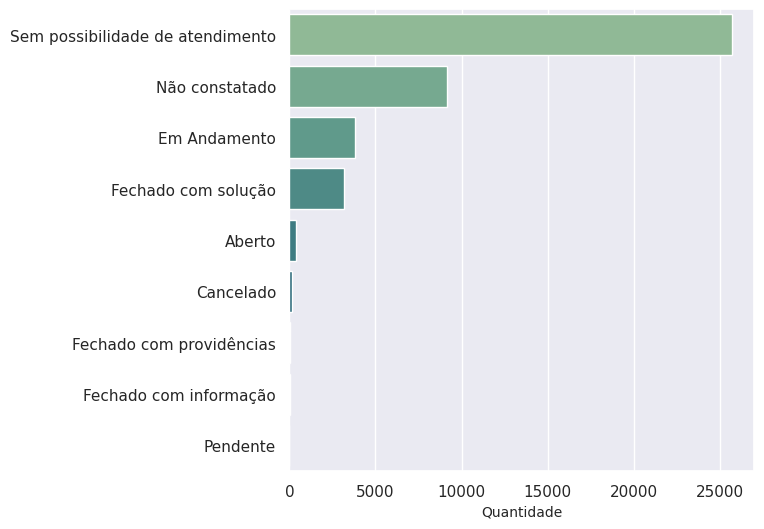

In [ ]:
barras_qtd = 9
df_top = df_ocorrencias_por_status1.head(barras_qtd)

# Transformando a primeira letra em maiúscula na coluna 'index'
#df_top.loc[:, 'urlCleaned'] = df_top['urlCleaned'].str.capitalize()

sns.set()
#custom_palette = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True, n_colors=barras_qtd)
#custom_palette = sns.diverging_palette(145, 300, s=60)

custom_palette = sns.color_palette("crest", n_colors=barras_qtd)
plt.figure(figsize=(6,6))
sns.barplot(x='contagem', y='status', data=df_top, palette=custom_palette)
plt.xlabel('Quantidade', fontsize=10)
#plt.xlabel('amount', fontsize=12)
plt.ylabel('')  # Oculta a legenda lateral

#plt.savefig('urls_2.png', format='png', bbox_inches='tight')

Gráfico de linhas para tendência de chamados ao longo do tempo

In [ ]:
import plotly.express as px
import pandas as pd

df_uniao_chamados_bairros_PS['data_inicio'] = pd.to_datetime(df_uniao_chamados_bairros_PS['data_inicio'])

df_tendencia = df_uniao_chamados_bairros_PS.groupby(df_uniao_chamados_bairros_PS['data_inicio'].dt.date).size().reset_index(name='id_chamado')


fig = px.line(df_tendencia,
              x='data_inicio',
              y='id_chamado',
              title='Tendência de chamados ao Longo do Tempo')


fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Número de chamados')

fig.show()


In [ ]:
df_chamados = pd.DataFrame(df_uniao_chamados_bairros_PS)
df_categorias = pd.DataFrame(df3)


df_chamados['data_inicio'] = pd.to_datetime(df_chamados['data_inicio'])
df_categorias['data_inicial'] = pd.to_datetime(df_categorias['data_inicial'])
df_categorias['data_final'] = pd.to_datetime(df_categorias['data_final'])


def verifica_correspondencia(data_inicio, data_inicial, data_final):
    return (data_inicio >= data_inicial) & (data_inicio <= data_final)


chamados_correspondentes = []
for _, chamado in df_chamados.iterrows():
    for _, categoria in df_categorias.iterrows():
        if verifica_correspondencia(chamado['data_inicio'], categoria['data_inicial'], categoria['data_final']):
            chamados_correspondentes.append((chamado['id_chamado'], categoria['evento'], chamado['data_inicio']))
            break


df_correspondencias = pd.DataFrame(chamados_correspondentes, columns=['id_chamado', 'evento', 'data_inicio'])

print(df_correspondencias)

     id_chamado       evento         data_inicio
0      18078140    Reveillon 2022-12-30 20:18:43
1      18077988    Reveillon 2022-12-30 18:54:32
2      18077970    Reveillon 2022-12-30 18:43:04
3      18077984    Reveillon 2022-12-30 18:53:12
4      18078946    Reveillon 2022-12-31 11:52:48
..          ...          ...                 ...
789    17661807  Rock in Rio 2022-09-03 01:23:27
790    17661222  Rock in Rio 2022-09-02 18:10:32
791    17682411  Rock in Rio 2022-09-09 21:15:04
792    17659781  Rock in Rio 2022-09-02 12:09:13
793    17682608  Rock in Rio 2022-09-10 00:12:50

[794 rows x 3 columns]


In [ ]:
df_correspondencias['numero_aparicoes'] = df_correspondencias.groupby(['id_chamado', 'evento'])['data_inicio'].transform('count')


contagem_categorias = df_correspondencias['evento'].value_counts().reset_index()
contagem_categorias.columns = ['evento', 'numero_aparicoes']

contagem_categorias

,evento,numero_aparicoes
0,Rock in Rio,518
1,Carnaval,197
2,Reveillon,79


In [ ]:

df_final = pd.merge(df_correspondencias, df_uniao_chamados_bairros_PS, on='id_chamado', how='left')

df_final.head()


,id_chamado,evento,data_inicio_x,numero_aparicoes,data_inicio_y,id_bairro,categoria,tipo,subtipo,status,longitude,latitude,reclamacoes,geometry,nome,subprefeitura
0,18078140,Reveillon,2022-12-30 20:18:43,1,2022-12-30 20:18:43,23.0,Serviço,Poluição sonora,Perturbação do sossego,Fechado com solução,-43.169188,-22.962173,0,POINT(-43.1691884 -22.962173),Leme,Zona Sul
1,18077988,Reveillon,2022-12-30 18:54:32,1,2022-12-30 18:54:32,35.0,Serviço,Poluição sonora,Perturbação do sossego,Fechado com solução,-43.236608,-22.917704,0,POINT(-43.236608 -22.917704),Maracanã,Grande Tijuca
2,18077970,Reveillon,2022-12-30 18:43:04,1,2022-12-30 18:43:04,35.0,Serviço,Poluição sonora,Perturbação do sossego,Fechado com solução,-43.236608,-22.917704,0,POINT(-43.236608 -22.917704),Maracanã,Grande Tijuca
3,18077984,Reveillon,2022-12-30 18:53:12,1,2022-12-30 18:53:12,35.0,Serviço,Poluição sonora,Perturbação do sossego,Fechado com solução,-43.236608,-22.917704,0,POINT(-43.236608 -22.917704),Maracanã,Grande Tijuca
4,18078946,Reveillon,2022-12-31 11:52:48,1,2022-12-31 11:52:48,141.0,Serviço,Poluição sonora,Perturbação do sossego,Fechado com solução,NaN,NaN,0,NaN,Bangu,Grande Bangu


In [ ]:
#df_final.to_csv('chamados_evento_final.csv', sep=',', index = False)

In [ ]:
#import plotly.express as px
#import pandas as pd

# Supondo que você já tenha um DataFrame df_uniao_chamados_bairros com os dados

# Agrupar o DataFrame por subprefeitura e tipo de chamado e contar a quantidade de chamados em cada grupo
df_count1 = df_final.groupby(['evento', 'status']).size().reset_index(name='count')


fig = px.bar(df_count1,
             x='evento',
             y='count',
             color='status',
             title='Tipos de Chamados por Subprefeitura',
             labels={'count': 'Número de Chamados'},
             barmode='stack')

fig.show()

In [ ]:
#import plotly.express as px
#import pandas as pd

# Supondo que você já tenha um DataFrame df_uniao_chamados_bairros com os dados

# Criar um mapa de dispersão com os pontos dos chamados agrupados por bairro usando Plotly Express
fig = px.scatter_mapbox(df_final,
                        lat='latitude',
                        lon='longitude',
                        color='evento',
                        hover_name='nome',
                        zoom=10,
                        mapbox_style="carto-positron",
                        center=dict(lat=-22.9068467, lon=-43.1728965),
                        title='Pontos de Chamados por evento')


fig.show()

In [ ]:
#import plotly.express as px
#import pandas as pd


df_count = df_final.groupby(['subprefeitura', 'evento']).size().reset_index(name='count')


fig = px.bar(df_count,
             x='subprefeitura',
             y='count',
             color='evento',
             title='Tipos de Chamados por Subprefeitura',
             labels={'count': 'Número de Chamados'},
             barmode='stack')

# Exibir o gráfico
fig.show()